In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Acess the volume of dataset according to the need

# df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv')
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100,]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [3]:
features = ['odometer','mmr','sellingprice','condition']
x = df[features]

In [4]:
x.head()

,odometer,mmr,sellingprice,condition
0,16639.0,20500.0,21500.0,5.0
1,9393.0,20800.0,21500.0,5.0
2,1331.0,31900.0,30000.0,45.0
3,14282.0,27500.0,27750.0,41.0
4,2641.0,66000.0,67000.0,43.0


In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_scaled.shape

(100, 4)

In [7]:
pca = PCA(n_components= 2)
pca_scaled = pca.fit_transform(x_scaled)

In [8]:
pca_scaled.shape

(100, 2)

In [9]:
contri_dummy = pca.components_.T
print(contri_dummy)

[[-0.08712228  0.84143763]
 [ 0.64957637 -0.10192658]
 [ 0.65777849 -0.08361452]
 [ 0.37119767  0.52402509]]


In [10]:
contribution_while_dimension_reduction = pd.DataFrame(data=contri_dummy, index=x.columns, columns=['pca 1', 'pca 2'])
contribution_while_dimension_reduction

,pca 1,pca 2
odometer,-0.087122,0.841438
mmr,0.649576,-0.101927
sellingprice,0.657778,-0.083615
condition,0.371198,0.524025


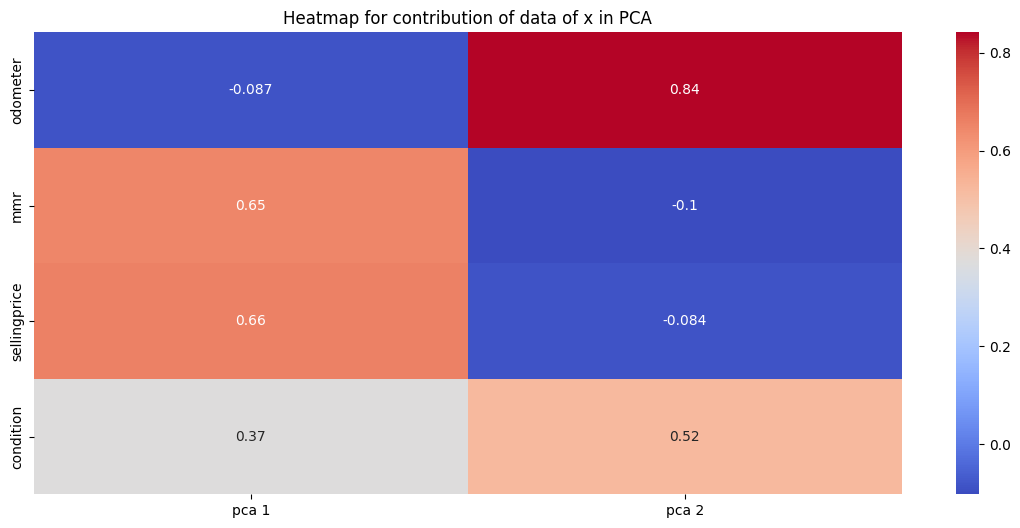

In [11]:
plt.figure(figsize=(14,6))
sns.heatmap(contribution_while_dimension_reduction, annot=True, cmap='coolwarm')
plt.title("Heatmap for contribution of data of x in PCA")
plt.show()

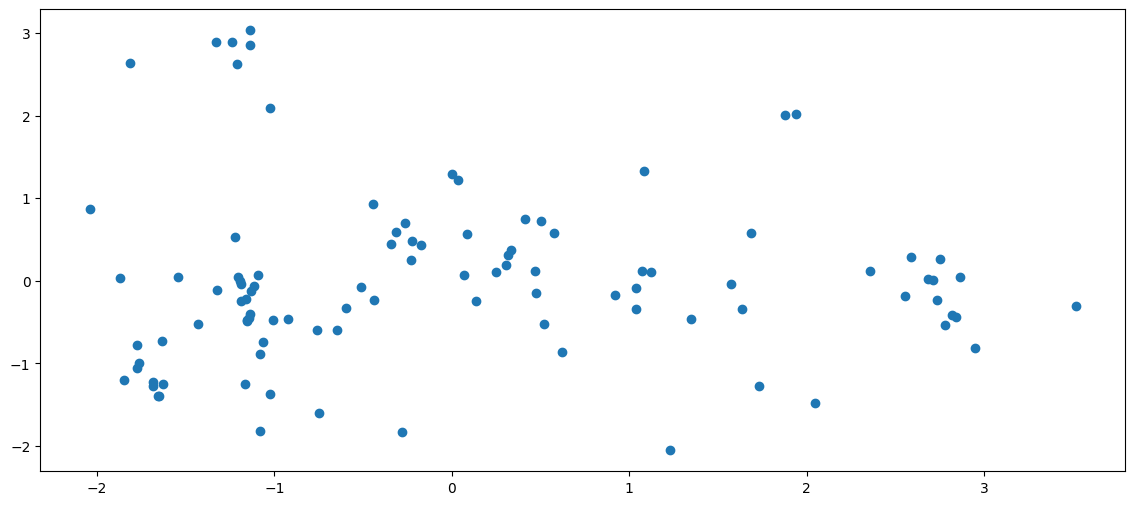

In [12]:
# Just visualization data
plt.figure(figsize=(14,6))
plt.scatter( x=pca_scaled[:,0], y=pca_scaled[:,1])

In [13]:
dbscan  = DBSCAN(eps= 0.7, min_samples= 8)

In [14]:
labels = dbscan.fit_predict(pca_scaled)

In [15]:
# labels

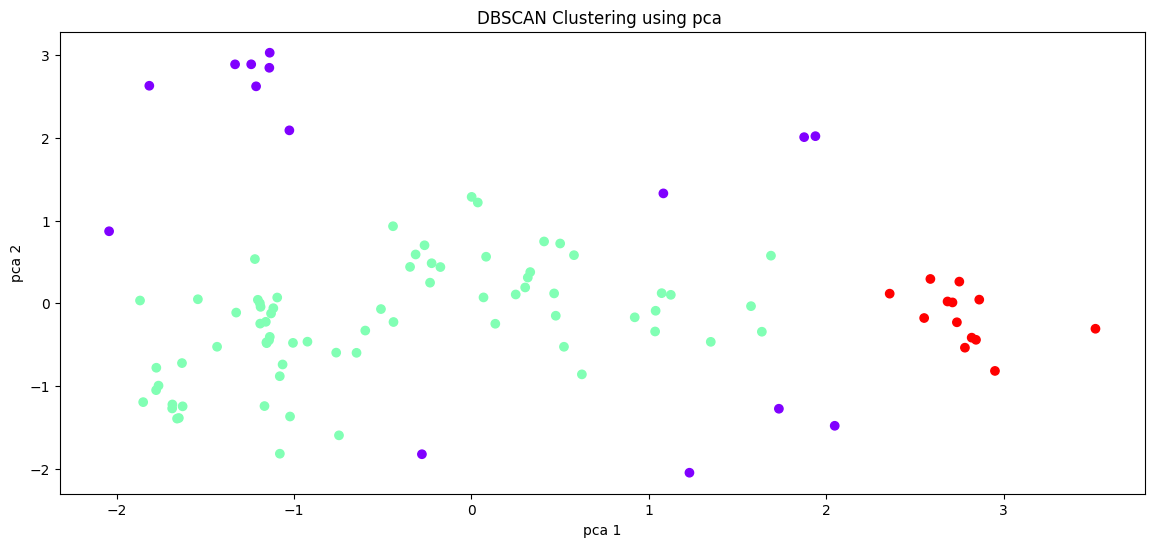

In [16]:
# Plotting CLuster based on MMR, condition and odometer

plt.figure(figsize=(14,6))
plt.scatter(pca_scaled[:,0],pca_scaled[:,1], c=labels,cmap='rainbow' )

plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.title('DBSCAN Clustering using pca ')


plt.savefig('./Graph/1.DBSCAN Clustering using pca.png')
plt.show()

In [17]:

print(silhouette_score(pca_scaled,labels))

0.40018514474622
